# Fashion MNIST

Following Chapter 10 of *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow*, 2nd Edition by Aurélien Géron.

In [ ]:
# Check imports

In [1]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.2.0'

In [2]:
keras.__version__

'2.3.0-tf'

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Load Data

Fashion MNIST can be obtained directly via Keras.

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

We will split the full training set into training and validation sets and scale data by dividing by 255.

In [6]:
X_val, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_val, y_train = y_train_full[:5000], y_train_full[5000:]

In [10]:
# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt',
          'Sneaker', 'Bag', 'Ankle boot']

In [11]:
class_names[y_train[0]]

'Coat'

## Sequential Model Building

### Basic Model

In [12]:
# Sequential model, simplest kind, single stack of layers connected sequentially
model = keras.models.Sequential()

# First layer is flatten to reshape image into 1D array. 
model.add(keras.layers.Flatten(input_shape = [28,28]))

# Add dense layers with RELU activation function
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))

# Add final layer with softmax activation and 10 units as 10 classes
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [13]:
# Get summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Note lots of parameters. First hidden layer would have 300*784 weights and 300 bias terms. Lots of flexibility but also risk of overfitting.

In [15]:
# View layers
model.layers

In [16]:
# Get weights of first hidden layer
hidden_1 = model.layers[1]
weights, biases = hidden_1.get_weights()

In [17]:
weights

array([[-0.00577056, -0.04244896,  0.05530582, ...,  0.07004876,
        -0.02228712, -0.05541346],
       [ 0.03963377, -0.05582736, -0.04436785, ..., -0.07201453,
        -0.05025643, -0.02289054],
       [-0.05298258,  0.06494178,  0.03413387, ...,  0.00861682,
         0.0503285 ,  0.06871217],
       ...,
       [ 0.0534883 , -0.03300976,  0.0153859 , ..., -0.00560385,
         0.0082223 , -0.03469051],
       [-0.05201211,  0.04583472, -0.02393974, ..., -0.05047594,
         0.01290941,  0.00698657],
       [ 0.05410136,  0.04044222, -0.05784511, ..., -0.04085902,
         0.02360579, -0.02677144]], dtype=float32)

In [18]:
weights.shape

(784, 300)

In [20]:
biases.shape

(300,)

In [21]:
# Compile model, select loss function and optimizer to use
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'sgd',
             metrics = ['accuracy'])

We use `sparse_categorical_crossentropy` loss as we have sparse labels and the classes are exclusive.
Default learning rate of 0.01 for `sgd` or could specify by using `optimizer = keras.optimizers.SGD(lr = ??)`.

In [22]:
# Train model, set epochs high enough to ensure convergence (default otherwise is 1)
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_val, y_val))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7326 - accuracy: 0.7581 - val_loss: 0.5091 - val_accuracy: 0.8270
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4906 - accuracy: 0.8286 - val_loss: 0.4464 - val_accuracy: 0.8496
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4459 - accuracy: 0.8440 - val_loss: 0.4145 - val_accuracy: 0.8576
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4172 - accuracy: 0.8533 - val_loss: 0.3980 - val_accuracy: 0.8668
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3983 - accuracy: 0.8590 - val_loss: 0.4123 - val_accuracy: 0.8566
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3817 - accuracy: 0.8658 - val_loss: 0.3798 - val_accuracy: 0.8730
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3682 - accuracy: 0.8698 - val_loss: 0.3794 - val_accuracy:

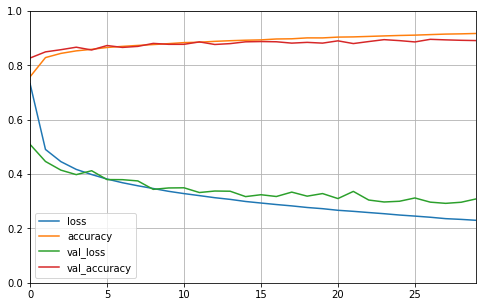

In [31]:
# Create dataframe with loss and accuracy values from history dictionary
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set vertical range to 0-1
plt.show()

Looks good, but if not would need to tweak hyperparameters such as learning rate, change optimizer, change number of layers, number of units per layer, batch size etc.

In [32]:
# Evaluate model on test set
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 895us/step - loss: 64.5432 - accuracy: 0.8477


[64.54315948486328, 0.8476999998092651]

In [33]:
# Make predictions
# Use first 3 instances of test set as don't have new data
X_new = X_test[:3]

In [35]:
y_proba = model.predict(X_new)
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [36]:
y_pred = model.predict_classes(X_new)
y_pred

W0814 11:07:41.866970 4393528768 deprecation.py:323] From <ipython-input-36-81ace37e545f>:1: Sequential.predict_classes (from tensorflow.python.keras.engine.sequential) is deprecated and will be removed after 2021-01-01.
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [40]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

### Using callbacks

In [41]:
# ModelCheckpoint saves checkpoints of model at regular intervals during training
# Save_best_only only saves model when best performance on validation set so far, avoids overfitting
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5', save_best_only = True)

In [42]:
# EarlyStopping interrupts training when it measures no progress on the validation set 
# for a number of epochs, specified by patience arg
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)

In [43]:
history = model.fit(X_train, y_train, epochs = 100,
                   validation_data = (X_val, y_val),
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2256 - accuracy: 0.9186 - val_loss: 0.2967 - val_accuracy: 0.8950
Epoch 2/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2232 - accuracy: 0.9193 - val_loss: 0.2893 - val_accuracy: 0.8960
Epoch 3/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2196 - accuracy: 0.9202 - val_loss: 0.2877 - val_accuracy: 0.8928
Epoch 4/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2153 - accuracy: 0.9221 - val_loss: 0.3086 - val_accuracy: 0.8812
Epoch 5/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2115 - accuracy: 0.9240 - val_loss: 0.3074 - val_accuracy: 0.8936
Epoch 6/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2079 - accuracy: 0.9252 - val_loss: 0.2922 - val_accuracy: 0.8952
Epoch 7/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2053 - accuracy: 0.9256 - val_loss: 0.2997 - val_ac

### Fine-tuning NN hyperparameters

In [44]:
# Create function that will build and compile Keras model
def build_model(n_hidden = 1, n_neurons = 30, lr = 3e-3, input_shape = [28,28]):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape = input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation = 'relu'))
    model.add(keras.layers.Dense(10, activation = 'softmax'))
    optimizer = keras.optimizers.SGD(lr = lr)
    model.compile(loss = 'sparse_categorical_crossentropy',
                  optimizer = optimizer,
                  metrics = ['accuracy'])
    return model

In [45]:
# Create KerasRegressor object
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [46]:
# Use object
keras_reg.fit(X_train, y_train, epochs = 100,
                   validation_data = (X_val, y_val),
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
1719/1719 [==============================] - 1s 785us/step - loss: 1.1401 - accuracy: 0.6465 - val_loss: 0.7734 - val_accuracy: 0.7506
Epoch 2/100
1719/1719 [==============================] - 1s 722us/step - loss: 0.7014 - accuracy: 0.7706 - val_loss: 0.6342 - val_accuracy: 0.7962
Epoch 3/100
1719/1719 [==============================] - 1s 723us/step - loss: 0.6106 - accuracy: 0.7983 - val_loss: 0.5720 - val_accuracy: 0.8156
Epoch 4/100
1719/1719 [==============================] - 1s 713us/step - loss: 0.5642 - accuracy: 0.8119 - val_loss: 0.5414 - val_accuracy: 0.8208
Epoch 5/100
1719/1719 [==============================] - 1s 723us/step - loss: 0.5350 - accuracy: 0.8196 - val_loss: 0.5144 - val_accuracy: 0.8302
Epoch 6/100
1719/1719 [==============================] - 1s 717us/step - loss: 0.5141 - accuracy: 0.8258 - val_loss: 0.4982 - val_accuracy: 0.8314
Epoch 7/100
1719/1719 [==============================] - 1s 719us/step - loss: 0.4983 - accuracy: 0.8308 - val_loss: 0

1719/1719 [==============================] - 5s 3ms/step - loss: 0.3575 - accuracy: 0.8764 - val_loss: 0.3725 - val_accuracy: 0.8732
Epoch 57/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3563 - accuracy: 0.8765 - val_loss: 0.3721 - val_accuracy: 0.8724
Epoch 58/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3555 - accuracy: 0.8770 - val_loss: 0.3683 - val_accuracy: 0.8708
Epoch 59/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3541 - accuracy: 0.8775 - val_loss: 0.3691 - val_accuracy: 0.8716
Epoch 60/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3534 - accuracy: 0.8768 - val_loss: 0.3681 - val_accuracy: 0.8734
Epoch 61/100
1719/1719 [==============================] - 2s 981us/step - loss: 0.3520 - accuracy: 0.8786 - val_loss: 0.3685 - val_accuracy: 0.8712
Epoch 62/100
1719/1719 [==============================] - 2s 958us/step - loss: 0.3515 - accuracy: 0.8785 - val_loss: 0.3673 - val_accu

Now let's use this process to train variants of models/ tweak hyperparameters.

In [49]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

params = {'n_hidden' : [0,1,2,3],
          'n_neurons' : np.arange(1,100),
          'lr' : reciprocal(3e-4, 3e-2)}

rnd_search_cv = RandomizedSearchCV(keras_reg, params, n_iter = 10, cv = 3)

rnd_search_cv.fit(X_train, y_train, epochs = 100, validation_data = (X_val, y_val),
                 callbacks = [keras.callbacks.EarlyStopping(patience = 10)])

Epoch 1/100
1146/1146 [==============================] - 1s 1ms/step - loss: 2.0258 - accuracy: 0.3496 - val_loss: 1.7333 - val_accuracy: 0.5052
Epoch 2/100
1146/1146 [==============================] - 1s 954us/step - loss: 1.5018 - accuracy: 0.5853 - val_loss: 1.2902 - val_accuracy: 0.6366
Epoch 3/100
1146/1146 [==============================] - 1s 914us/step - loss: 1.1697 - accuracy: 0.6481 - val_loss: 1.0540 - val_accuracy: 0.6656
Epoch 4/100
1146/1146 [==============================] - 1s 971us/step - loss: 0.9977 - accuracy: 0.6701 - val_loss: 0.9302 - val_accuracy: 0.6880
Epoch 5/100
1146/1146 [==============================] - 1s 1ms/step - loss: 0.8993 - accuracy: 0.6916 - val_loss: 0.8532 - val_accuracy: 0.7064
Epoch 6/100
1146/1146 [==============================] - 1s 932us/step - loss: 0.8344 - accuracy: 0.7116 - val_loss: 0.7994 - val_accuracy: 0.7258
Epoch 7/100
1146/1146 [==============================] - 1s 934us/step - loss: 0.7867 - accuracy: 0.7296 - val_loss: 0.758

Epoch 57/100
1146/1146 [==============================] - 1s 930us/step - loss: 0.4349 - accuracy: 0.8510 - val_loss: 0.4344 - val_accuracy: 0.8564
Epoch 58/100
1146/1146 [==============================] - 1s 898us/step - loss: 0.4334 - accuracy: 0.8517 - val_loss: 0.4338 - val_accuracy: 0.8568
Epoch 59/100
1146/1146 [==============================] - 1s 883us/step - loss: 0.4319 - accuracy: 0.8526 - val_loss: 0.4321 - val_accuracy: 0.8578
Epoch 60/100
1146/1146 [==============================] - 1s 895us/step - loss: 0.4306 - accuracy: 0.8516 - val_loss: 0.4337 - val_accuracy: 0.8546
Epoch 61/100
1146/1146 [==============================] - 1s 1ms/step - loss: 0.4294 - accuracy: 0.8528 - val_loss: 0.4309 - val_accuracy: 0.8570
Epoch 62/100
1146/1146 [==============================] - 1s 1ms/step - loss: 0.4279 - accuracy: 0.8540 - val_loss: 0.4289 - val_accuracy: 0.8582
Epoch 63/100
1146/1146 [==============================] - 1s 948us/step - loss: 0.4264 - accuracy: 0.8538 - val_loss

1146/1146 [==============================] - 1s 970us/step - loss: 0.6599 - accuracy: 0.7792 - val_loss: 0.6411 - val_accuracy: 0.7868
Epoch 13/100
1146/1146 [==============================] - 1s 950us/step - loss: 0.6443 - accuracy: 0.7850 - val_loss: 0.6252 - val_accuracy: 0.7930
Epoch 14/100
1146/1146 [==============================] - 1s 940us/step - loss: 0.6300 - accuracy: 0.7892 - val_loss: 0.6116 - val_accuracy: 0.7970
Epoch 15/100
1146/1146 [==============================] - 1s 913us/step - loss: 0.6176 - accuracy: 0.7927 - val_loss: 0.6009 - val_accuracy: 0.7996
Epoch 16/100
1146/1146 [==============================] - 1s 948us/step - loss: 0.6061 - accuracy: 0.7972 - val_loss: 0.5895 - val_accuracy: 0.8040
Epoch 17/100
1146/1146 [==============================] - 1s 932us/step - loss: 0.5957 - accuracy: 0.8000 - val_loss: 0.5806 - val_accuracy: 0.8070
Epoch 18/100
1146/1146 [==============================] - 1s 930us/step - loss: 0.5858 - accuracy: 0.8024 - val_loss: 0.5709 

Epoch 68/100
1146/1146 [==============================] - 1s 1ms/step - loss: 0.4297 - accuracy: 0.8491 - val_loss: 0.4331 - val_accuracy: 0.8556
Epoch 69/100
1146/1146 [==============================] - 1s 992us/step - loss: 0.4283 - accuracy: 0.8505 - val_loss: 0.4285 - val_accuracy: 0.8520
Epoch 70/100
1146/1146 [==============================] - 1s 1ms/step - loss: 0.4274 - accuracy: 0.8501 - val_loss: 0.4268 - val_accuracy: 0.8536
Epoch 71/100
1146/1146 [==============================] - 2s 1ms/step - loss: 0.4261 - accuracy: 0.8509 - val_loss: 0.4267 - val_accuracy: 0.8536
Epoch 72/100
1146/1146 [==============================] - 2s 2ms/step - loss: 0.4251 - accuracy: 0.8510 - val_loss: 0.4244 - val_accuracy: 0.8566
Epoch 73/100
1146/1146 [==============================] - 2s 1ms/step - loss: 0.4239 - accuracy: 0.8510 - val_loss: 0.4244 - val_accuracy: 0.8560
Epoch 74/100
1146/1146 [==============================] - 1s 1ms/step - loss: 0.4229 - accuracy: 0.8513 - val_loss: 0.4232

1146/1146 [==============================] - 1s 970us/step - loss: 0.5286 - accuracy: 0.8209 - val_loss: 0.5225 - val_accuracy: 0.8258
Epoch 24/100
1146/1146 [==============================] - 1s 1ms/step - loss: 0.5235 - accuracy: 0.8229 - val_loss: 0.5173 - val_accuracy: 0.8288
Epoch 25/100
1146/1146 [==============================] - 1s 1ms/step - loss: 0.5187 - accuracy: 0.8236 - val_loss: 0.5133 - val_accuracy: 0.8272
Epoch 26/100
1146/1146 [==============================] - 1s 1ms/step - loss: 0.5139 - accuracy: 0.8249 - val_loss: 0.5090 - val_accuracy: 0.8322
Epoch 27/100
1146/1146 [==============================] - 1s 1ms/step - loss: 0.5098 - accuracy: 0.8278 - val_loss: 0.5050 - val_accuracy: 0.8332
Epoch 28/100
1146/1146 [==============================] - 1s 989us/step - loss: 0.5056 - accuracy: 0.8273 - val_loss: 0.5016 - val_accuracy: 0.8334
Epoch 29/100
1146/1146 [==============================] - 1s 962us/step - loss: 0.5018 - accuracy: 0.8291 - val_loss: 0.4967 - val_ac

Epoch 79/100
1146/1146 [==============================] - 1s 1ms/step - loss: 0.4115 - accuracy: 0.8578 - val_loss: 0.4219 - val_accuracy: 0.8574
Epoch 80/100
1146/1146 [==============================] - 1s 1ms/step - loss: 0.4103 - accuracy: 0.8593 - val_loss: 0.4223 - val_accuracy: 0.8558
Epoch 81/100
1146/1146 [==============================] - 1s 922us/step - loss: 0.4093 - accuracy: 0.8586 - val_loss: 0.4208 - val_accuracy: 0.8572
Epoch 82/100
1146/1146 [==============================] - 1s 986us/step - loss: 0.4079 - accuracy: 0.8585 - val_loss: 0.4235 - val_accuracy: 0.8566
Epoch 83/100
1146/1146 [==============================] - 1s 1ms/step - loss: 0.4071 - accuracy: 0.8597 - val_loss: 0.4214 - val_accuracy: 0.8572
Epoch 84/100
1146/1146 [==============================] - 1s 1ms/step - loss: 0.4062 - accuracy: 0.8603 - val_loss: 0.4174 - val_accuracy: 0.8586
Epoch 85/100
1146/1146 [==============================] - 1s 913us/step - loss: 0.4054 - accuracy: 0.8592 - val_loss: 0.

1146/1146 [==============================] - 1s 743us/step - loss: 0.5953 - accuracy: 0.8010 - val_loss: 0.5863 - val_accuracy: 0.8078
Epoch 35/100
1146/1146 [==============================] - 1s 744us/step - loss: 0.5904 - accuracy: 0.8027 - val_loss: 0.5813 - val_accuracy: 0.8092
Epoch 36/100
1146/1146 [==============================] - 1s 742us/step - loss: 0.5858 - accuracy: 0.8046 - val_loss: 0.5774 - val_accuracy: 0.8104
Epoch 37/100
1146/1146 [==============================] - 1s 747us/step - loss: 0.5814 - accuracy: 0.8061 - val_loss: 0.5735 - val_accuracy: 0.8110
Epoch 38/100
1146/1146 [==============================] - 1s 749us/step - loss: 0.5772 - accuracy: 0.8070 - val_loss: 0.5683 - val_accuracy: 0.8128
Epoch 39/100
1146/1146 [==============================] - 1s 767us/step - loss: 0.5732 - accuracy: 0.8082 - val_loss: 0.5648 - val_accuracy: 0.8156
Epoch 40/100
1146/1146 [==============================] - 1s 749us/step - loss: 0.5694 - accuracy: 0.8095 - val_loss: 0.5609 

1146/1146 [==============================] - 1s 845us/step - loss: 0.4743 - accuracy: 0.8373 - val_loss: 0.4690 - val_accuracy: 0.8400
Epoch 90/100
1146/1146 [==============================] - 1s 791us/step - loss: 0.4733 - accuracy: 0.8382 - val_loss: 0.4681 - val_accuracy: 0.8420
Epoch 91/100
1146/1146 [==============================] - 1s 801us/step - loss: 0.4722 - accuracy: 0.8374 - val_loss: 0.4671 - val_accuracy: 0.8408
Epoch 92/100
1146/1146 [==============================] - 1s 776us/step - loss: 0.4712 - accuracy: 0.8389 - val_loss: 0.4663 - val_accuracy: 0.8412
Epoch 93/100
1146/1146 [==============================] - 1s 845us/step - loss: 0.4702 - accuracy: 0.8383 - val_loss: 0.4652 - val_accuracy: 0.8426
Epoch 94/100
1146/1146 [==============================] - 1s 910us/step - loss: 0.4691 - accuracy: 0.8395 - val_loss: 0.4644 - val_accuracy: 0.8416
Epoch 95/100
1146/1146 [==============================] - 1s 1ms/step - loss: 0.4683 - accuracy: 0.8394 - val_loss: 0.4629 - 

Epoch 44/100
1146/1146 [==============================] - 1s 781us/step - loss: 0.5533 - accuracy: 0.8121 - val_loss: 0.5408 - val_accuracy: 0.8202
Epoch 45/100
1146/1146 [==============================] - 1s 922us/step - loss: 0.5499 - accuracy: 0.8132 - val_loss: 0.5367 - val_accuracy: 0.8236
Epoch 46/100
1146/1146 [==============================] - 1s 985us/step - loss: 0.5465 - accuracy: 0.8148 - val_loss: 0.5336 - val_accuracy: 0.8232
Epoch 47/100
1146/1146 [==============================] - 1s 760us/step - loss: 0.5432 - accuracy: 0.8155 - val_loss: 0.5313 - val_accuracy: 0.8246
Epoch 48/100
1146/1146 [==============================] - 1s 818us/step - loss: 0.5402 - accuracy: 0.8165 - val_loss: 0.5279 - val_accuracy: 0.8258
Epoch 49/100
1146/1146 [==============================] - 1s 795us/step - loss: 0.5370 - accuracy: 0.8185 - val_loss: 0.5257 - val_accuracy: 0.8264
Epoch 50/100
1146/1146 [==============================] - 1s 876us/step - loss: 0.5343 - accuracy: 0.8183 - val_

1146/1146 [==============================] - 1s 751us/step - loss: 0.4582 - accuracy: 0.8408 - val_loss: 0.4540 - val_accuracy: 0.8454
Epoch 100/100
573/573 [==============================] - 0s 559us/step - loss: 0.4606 - accuracy: 0.8443
Epoch 1/100
1146/1146 [==============================] - 1s 843us/step - loss: 2.1622 - accuracy: 0.2092 - val_loss: 2.0275 - val_accuracy: 0.2654
Epoch 2/100
1146/1146 [==============================] - 1s 909us/step - loss: 1.9192 - accuracy: 0.3253 - val_loss: 1.8049 - val_accuracy: 0.3938
Epoch 3/100
1146/1146 [==============================] - 1s 915us/step - loss: 1.7144 - accuracy: 0.4344 - val_loss: 1.6007 - val_accuracy: 0.4904
Epoch 4/100
1146/1146 [==============================] - 1s 838us/step - loss: 1.5209 - accuracy: 0.5065 - val_loss: 1.4127 - val_accuracy: 0.5770
Epoch 5/100
1146/1146 [==============================] - 1s 796us/step - loss: 1.3484 - accuracy: 0.5922 - val_loss: 1.2529 - val_accuracy: 0.6404
Epoch 6/100
1146/1146 [==

1146/1146 [==============================] - 1s 867us/step - loss: 0.5465 - accuracy: 0.8139 - val_loss: 0.5349 - val_accuracy: 0.8188
Epoch 55/100
1146/1146 [==============================] - 1s 778us/step - loss: 0.5440 - accuracy: 0.8141 - val_loss: 0.5330 - val_accuracy: 0.8196
Epoch 56/100
1146/1146 [==============================] - 1s 1ms/step - loss: 0.5413 - accuracy: 0.8145 - val_loss: 0.5310 - val_accuracy: 0.8220
Epoch 57/100
1146/1146 [==============================] - 1s 1ms/step - loss: 0.5389 - accuracy: 0.8155 - val_loss: 0.5286 - val_accuracy: 0.8216
Epoch 58/100
1146/1146 [==============================] - 1s 801us/step - loss: 0.5364 - accuracy: 0.8158 - val_loss: 0.5262 - val_accuracy: 0.8248
Epoch 59/100
1146/1146 [==============================] - 1s 875us/step - loss: 0.5341 - accuracy: 0.8165 - val_loss: 0.5243 - val_accuracy: 0.8234
Epoch 60/100
1146/1146 [==============================] - 1s 884us/step - loss: 0.5318 - accuracy: 0.8185 - val_loss: 0.5217 - va

1146/1146 [==============================] - 1s 1ms/step - loss: 0.5078 - accuracy: 0.8256 - val_loss: 0.4876 - val_accuracy: 0.8310
Epoch 10/100
1146/1146 [==============================] - 1s 912us/step - loss: 0.4944 - accuracy: 0.8306 - val_loss: 0.4765 - val_accuracy: 0.8372
Epoch 11/100
1146/1146 [==============================] - 1s 930us/step - loss: 0.4848 - accuracy: 0.8336 - val_loss: 0.4751 - val_accuracy: 0.8320
Epoch 12/100
1146/1146 [==============================] - 1s 892us/step - loss: 0.4756 - accuracy: 0.8346 - val_loss: 0.4571 - val_accuracy: 0.8438
Epoch 13/100
1146/1146 [==============================] - 1s 915us/step - loss: 0.4678 - accuracy: 0.8384 - val_loss: 0.4556 - val_accuracy: 0.8422
Epoch 14/100
1146/1146 [==============================] - 1s 1ms/step - loss: 0.4604 - accuracy: 0.8400 - val_loss: 0.4489 - val_accuracy: 0.8428
Epoch 15/100
1146/1146 [==============================] - 1s 1ms/step - loss: 0.4536 - accuracy: 0.8431 - val_loss: 0.4440 - val_

Epoch 65/100
1146/1146 [==============================] - 2s 1ms/step - loss: 0.3228 - accuracy: 0.8877 - val_loss: 0.3632 - val_accuracy: 0.8744
Epoch 66/100
1146/1146 [==============================] - 1s 1ms/step - loss: 0.3218 - accuracy: 0.8864 - val_loss: 0.3627 - val_accuracy: 0.8764
Epoch 67/100
1146/1146 [==============================] - 1s 942us/step - loss: 0.3198 - accuracy: 0.8890 - val_loss: 0.3599 - val_accuracy: 0.8746
Epoch 68/100
1146/1146 [==============================] - 2s 1ms/step - loss: 0.3190 - accuracy: 0.8892 - val_loss: 0.3617 - val_accuracy: 0.8722
Epoch 69/100
1146/1146 [==============================] - 2s 2ms/step - loss: 0.3179 - accuracy: 0.8878 - val_loss: 0.3571 - val_accuracy: 0.8786
Epoch 70/100
1146/1146 [==============================] - 1s 902us/step - loss: 0.3165 - accuracy: 0.8886 - val_loss: 0.3588 - val_accuracy: 0.8746
Epoch 71/100
1146/1146 [==============================] - 1s 1ms/step - loss: 0.3148 - accuracy: 0.8901 - val_loss: 0.36

1146/1146 [==============================] - 1s 899us/step - loss: 0.3686 - accuracy: 0.8705 - val_loss: 0.3821 - val_accuracy: 0.8656
Epoch 37/100
1146/1146 [==============================] - 1s 890us/step - loss: 0.3658 - accuracy: 0.8706 - val_loss: 0.4147 - val_accuracy: 0.8532
Epoch 38/100
1146/1146 [==============================] - 1s 915us/step - loss: 0.3644 - accuracy: 0.8712 - val_loss: 0.3855 - val_accuracy: 0.8676
Epoch 39/100
1146/1146 [==============================] - 1s 890us/step - loss: 0.3615 - accuracy: 0.8717 - val_loss: 0.3838 - val_accuracy: 0.8664
Epoch 40/100
1146/1146 [==============================] - 1s 903us/step - loss: 0.3588 - accuracy: 0.8738 - val_loss: 0.3820 - val_accuracy: 0.8656
Epoch 41/100
1146/1146 [==============================] - 1s 900us/step - loss: 0.3577 - accuracy: 0.8735 - val_loss: 0.3824 - val_accuracy: 0.8662
Epoch 42/100
1146/1146 [==============================] - 1s 901us/step - loss: 0.3563 - accuracy: 0.8746 - val_loss: 0.3740 

1146/1146 [==============================] - 1s 941us/step - loss: 0.2820 - accuracy: 0.8993 - val_loss: 0.3481 - val_accuracy: 0.8738
Epoch 92/100
1146/1146 [==============================] - 1s 955us/step - loss: 0.2799 - accuracy: 0.9001 - val_loss: 0.3478 - val_accuracy: 0.8738
Epoch 93/100
1146/1146 [==============================] - 1s 1ms/step - loss: 0.2790 - accuracy: 0.9002 - val_loss: 0.3439 - val_accuracy: 0.8770
Epoch 94/100
1146/1146 [==============================] - 1s 1ms/step - loss: 0.2786 - accuracy: 0.9007 - val_loss: 0.3569 - val_accuracy: 0.8752
Epoch 95/100
1146/1146 [==============================] - 1s 1ms/step - loss: 0.2768 - accuracy: 0.9019 - val_loss: 0.3466 - val_accuracy: 0.8748
Epoch 96/100
1146/1146 [==============================] - 1s 899us/step - loss: 0.2761 - accuracy: 0.9015 - val_loss: 0.3477 - val_accuracy: 0.8766
Epoch 97/100
1146/1146 [==============================] - 1s 897us/step - loss: 0.2751 - accuracy: 0.9027 - val_loss: 0.3489 - val_

1146/1146 [==============================] - 1s 1ms/step - loss: 0.3529 - accuracy: 0.8749 - val_loss: 0.3787 - val_accuracy: 0.8698
Epoch 47/100
1146/1146 [==============================] - 1s 990us/step - loss: 0.3499 - accuracy: 0.8766 - val_loss: 0.3750 - val_accuracy: 0.8698
Epoch 48/100
1146/1146 [==============================] - 1s 1ms/step - loss: 0.3484 - accuracy: 0.8767 - val_loss: 0.3730 - val_accuracy: 0.8716
Epoch 49/100
1146/1146 [==============================] - 1s 1ms/step - loss: 0.3470 - accuracy: 0.8769 - val_loss: 0.3729 - val_accuracy: 0.8710
Epoch 50/100
1146/1146 [==============================] - 1s 990us/step - loss: 0.3447 - accuracy: 0.8778 - val_loss: 0.3766 - val_accuracy: 0.8692
Epoch 51/100
1146/1146 [==============================] - 1s 1ms/step - loss: 0.3435 - accuracy: 0.8792 - val_loss: 0.3763 - val_accuracy: 0.8702
Epoch 52/100
1146/1146 [==============================] - 1s 1ms/step - loss: 0.3407 - accuracy: 0.8800 - val_loss: 0.3769 - val_accu

1146/1146 [==============================] - 1s 779us/step - loss: 1.4987 - accuracy: 0.5438 - val_loss: 1.0919 - val_accuracy: 0.6844
Epoch 2/100
1146/1146 [==============================] - 1s 721us/step - loss: 0.9820 - accuracy: 0.6905 - val_loss: 0.8914 - val_accuracy: 0.7186
Epoch 3/100
1146/1146 [==============================] - 1s 701us/step - loss: 0.8504 - accuracy: 0.7273 - val_loss: 0.8032 - val_accuracy: 0.7476
Epoch 4/100
1146/1146 [==============================] - 1s 707us/step - loss: 0.7818 - accuracy: 0.7515 - val_loss: 0.7494 - val_accuracy: 0.7644
Epoch 5/100
1146/1146 [==============================] - 1s 699us/step - loss: 0.7372 - accuracy: 0.7655 - val_loss: 0.7124 - val_accuracy: 0.7752
Epoch 6/100
1146/1146 [==============================] - 1s 695us/step - loss: 0.7047 - accuracy: 0.7761 - val_loss: 0.6847 - val_accuracy: 0.7828
Epoch 7/100
1146/1146 [==============================] - 1s 696us/step - loss: 0.6798 - accuracy: 0.7832 - val_loss: 0.6627 - val_

1146/1146 [==============================] - 1s 671us/step - loss: 0.4734 - accuracy: 0.8422 - val_loss: 0.4743 - val_accuracy: 0.8466
Epoch 57/100
1146/1146 [==============================] - 1s 707us/step - loss: 0.4723 - accuracy: 0.8424 - val_loss: 0.4732 - val_accuracy: 0.8474
Epoch 58/100
1146/1146 [==============================] - 1s 784us/step - loss: 0.4713 - accuracy: 0.8426 - val_loss: 0.4726 - val_accuracy: 0.8498
Epoch 59/100
1146/1146 [==============================] - 1s 763us/step - loss: 0.4703 - accuracy: 0.8429 - val_loss: 0.4712 - val_accuracy: 0.8484
Epoch 60/100
1146/1146 [==============================] - 1s 754us/step - loss: 0.4692 - accuracy: 0.8430 - val_loss: 0.4709 - val_accuracy: 0.8478
Epoch 61/100
1146/1146 [==============================] - 1s 719us/step - loss: 0.4683 - accuracy: 0.8436 - val_loss: 0.4692 - val_accuracy: 0.8482
Epoch 62/100
1146/1146 [==============================] - 1s 750us/step - loss: 0.4673 - accuracy: 0.8436 - val_loss: 0.4688 

Epoch 11/100
1146/1146 [==============================] - 1s 813us/step - loss: 0.6159 - accuracy: 0.7998 - val_loss: 0.6006 - val_accuracy: 0.8120
Epoch 12/100
1146/1146 [==============================] - 1s 688us/step - loss: 0.6053 - accuracy: 0.8026 - val_loss: 0.5904 - val_accuracy: 0.8128
Epoch 13/100
1146/1146 [==============================] - 1s 680us/step - loss: 0.5963 - accuracy: 0.8054 - val_loss: 0.5823 - val_accuracy: 0.8170
Epoch 14/100
1146/1146 [==============================] - 1s 697us/step - loss: 0.5883 - accuracy: 0.8081 - val_loss: 0.5758 - val_accuracy: 0.8192
Epoch 15/100
1146/1146 [==============================] - 1s 672us/step - loss: 0.5808 - accuracy: 0.8095 - val_loss: 0.5697 - val_accuracy: 0.8196
Epoch 16/100
1146/1146 [==============================] - 1s 676us/step - loss: 0.5743 - accuracy: 0.8116 - val_loss: 0.5629 - val_accuracy: 0.8214
Epoch 17/100
1146/1146 [==============================] - 1s 730us/step - loss: 0.5681 - accuracy: 0.8135 - val_

1146/1146 [==============================] - 1s 695us/step - loss: 0.4665 - accuracy: 0.8427 - val_loss: 0.4684 - val_accuracy: 0.8496
Epoch 67/100
1146/1146 [==============================] - 1s 706us/step - loss: 0.4658 - accuracy: 0.8425 - val_loss: 0.4665 - val_accuracy: 0.8482
Epoch 68/100
1146/1146 [==============================] - 1s 760us/step - loss: 0.4649 - accuracy: 0.8424 - val_loss: 0.4664 - val_accuracy: 0.8466
Epoch 69/100
1146/1146 [==============================] - 1s 760us/step - loss: 0.4641 - accuracy: 0.8425 - val_loss: 0.4654 - val_accuracy: 0.8484
Epoch 70/100
1146/1146 [==============================] - 1s 776us/step - loss: 0.4634 - accuracy: 0.8431 - val_loss: 0.4645 - val_accuracy: 0.8480
Epoch 71/100
1146/1146 [==============================] - 1s 732us/step - loss: 0.4626 - accuracy: 0.8430 - val_loss: 0.4639 - val_accuracy: 0.8472
Epoch 72/100
1146/1146 [==============================] - 1s 671us/step - loss: 0.4619 - accuracy: 0.8431 - val_loss: 0.4634 

Epoch 21/100
1146/1146 [==============================] - 1s 725us/step - loss: 0.5477 - accuracy: 0.8212 - val_loss: 0.5391 - val_accuracy: 0.8308
Epoch 22/100
1146/1146 [==============================] - 1s 722us/step - loss: 0.5435 - accuracy: 0.8223 - val_loss: 0.5350 - val_accuracy: 0.8322
Epoch 23/100
1146/1146 [==============================] - 1s 711us/step - loss: 0.5396 - accuracy: 0.8239 - val_loss: 0.5320 - val_accuracy: 0.8322
Epoch 24/100
1146/1146 [==============================] - 1s 687us/step - loss: 0.5359 - accuracy: 0.8242 - val_loss: 0.5280 - val_accuracy: 0.8344
Epoch 25/100
1146/1146 [==============================] - 1s 691us/step - loss: 0.5325 - accuracy: 0.8258 - val_loss: 0.5257 - val_accuracy: 0.8346
Epoch 26/100
1146/1146 [==============================] - 1s 777us/step - loss: 0.5291 - accuracy: 0.8262 - val_loss: 0.5217 - val_accuracy: 0.8334
Epoch 27/100
1146/1146 [==============================] - 1s 761us/step - loss: 0.5260 - accuracy: 0.8274 - val_

1146/1146 [==============================] - 1s 667us/step - loss: 0.4576 - accuracy: 0.8460 - val_loss: 0.4601 - val_accuracy: 0.8500
Epoch 77/100
1146/1146 [==============================] - 1s 664us/step - loss: 0.4569 - accuracy: 0.8460 - val_loss: 0.4587 - val_accuracy: 0.8508
Epoch 78/100
1146/1146 [==============================] - 1s 675us/step - loss: 0.4563 - accuracy: 0.8465 - val_loss: 0.4585 - val_accuracy: 0.8506
Epoch 79/100
1146/1146 [==============================] - 1s 687us/step - loss: 0.4556 - accuracy: 0.8462 - val_loss: 0.4583 - val_accuracy: 0.8490
Epoch 80/100
1146/1146 [==============================] - 1s 689us/step - loss: 0.4548 - accuracy: 0.8468 - val_loss: 0.4584 - val_accuracy: 0.8490
Epoch 81/100
1146/1146 [==============================] - 1s 673us/step - loss: 0.4543 - accuracy: 0.8465 - val_loss: 0.4578 - val_accuracy: 0.8506
Epoch 82/100
1146/1146 [==============================] - 1s 668us/step - loss: 0.4536 - accuracy: 0.8472 - val_loss: 0.4573 

Epoch 31/100
1146/1146 [==============================] - 1s 735us/step - loss: 0.5060 - accuracy: 0.8333 - val_loss: 0.5025 - val_accuracy: 0.8406
Epoch 32/100
1146/1146 [==============================] - 1s 754us/step - loss: 0.5036 - accuracy: 0.8340 - val_loss: 0.4999 - val_accuracy: 0.8410
Epoch 33/100
1146/1146 [==============================] - 1s 762us/step - loss: 0.5015 - accuracy: 0.8345 - val_loss: 0.4986 - val_accuracy: 0.8398
Epoch 34/100
1146/1146 [==============================] - 1s 743us/step - loss: 0.4994 - accuracy: 0.8350 - val_loss: 0.4963 - val_accuracy: 0.8418
Epoch 35/100
1146/1146 [==============================] - 1s 756us/step - loss: 0.4973 - accuracy: 0.8354 - val_loss: 0.4961 - val_accuracy: 0.8418
Epoch 36/100
1146/1146 [==============================] - 1s 730us/step - loss: 0.4954 - accuracy: 0.8361 - val_loss: 0.4924 - val_accuracy: 0.8412
Epoch 37/100
1146/1146 [==============================] - 1s 735us/step - loss: 0.4935 - accuracy: 0.8361 - val_

1146/1146 [==============================] - 1s 738us/step - loss: 0.4446 - accuracy: 0.8509 - val_loss: 0.4506 - val_accuracy: 0.8524
Epoch 87/100
1146/1146 [==============================] - 1s 738us/step - loss: 0.4440 - accuracy: 0.8515 - val_loss: 0.4488 - val_accuracy: 0.8520
Epoch 88/100
1146/1146 [==============================] - 1s 786us/step - loss: 0.4435 - accuracy: 0.8522 - val_loss: 0.4494 - val_accuracy: 0.8530
Epoch 89/100
1146/1146 [==============================] - 1s 748us/step - loss: 0.4429 - accuracy: 0.8515 - val_loss: 0.4476 - val_accuracy: 0.8534
Epoch 90/100
1146/1146 [==============================] - 1s 738us/step - loss: 0.4424 - accuracy: 0.8523 - val_loss: 0.4479 - val_accuracy: 0.8534
Epoch 91/100
1146/1146 [==============================] - 1s 770us/step - loss: 0.4418 - accuracy: 0.8521 - val_loss: 0.4469 - val_accuracy: 0.8530
Epoch 92/100
1146/1146 [==============================] - 1s 766us/step - loss: 0.4412 - accuracy: 0.8526 - val_loss: 0.4468 

Epoch 41/100
1146/1146 [==============================] - 1s 674us/step - loss: 0.4901 - accuracy: 0.8344 - val_loss: 0.4892 - val_accuracy: 0.8402
Epoch 42/100
1146/1146 [==============================] - 1s 669us/step - loss: 0.4886 - accuracy: 0.8344 - val_loss: 0.4873 - val_accuracy: 0.8398
Epoch 43/100
1146/1146 [==============================] - 1s 689us/step - loss: 0.4870 - accuracy: 0.8352 - val_loss: 0.4884 - val_accuracy: 0.8408
Epoch 44/100
1146/1146 [==============================] - 1s 671us/step - loss: 0.4855 - accuracy: 0.8357 - val_loss: 0.4850 - val_accuracy: 0.8394
Epoch 45/100
1146/1146 [==============================] - 1s 674us/step - loss: 0.4840 - accuracy: 0.8357 - val_loss: 0.4844 - val_accuracy: 0.8398
Epoch 46/100
1146/1146 [==============================] - 1s 673us/step - loss: 0.4827 - accuracy: 0.8358 - val_loss: 0.4836 - val_accuracy: 0.8408
Epoch 47/100
1146/1146 [==============================] - 1s 672us/step - loss: 0.4814 - accuracy: 0.8366 - val_

1146/1146 [==============================] - 1s 669us/step - loss: 0.4426 - accuracy: 0.8485 - val_loss: 0.4494 - val_accuracy: 0.8490
Epoch 97/100
1146/1146 [==============================] - 1s 674us/step - loss: 0.4421 - accuracy: 0.8493 - val_loss: 0.4492 - val_accuracy: 0.8502
Epoch 98/100
1146/1146 [==============================] - 1s 681us/step - loss: 0.4415 - accuracy: 0.8490 - val_loss: 0.4484 - val_accuracy: 0.8494
Epoch 99/100
1146/1146 [==============================] - 1s 692us/step - loss: 0.4411 - accuracy: 0.8494 - val_loss: 0.4489 - val_accuracy: 0.8512
Epoch 100/100
573/573 [==============================] - 0s 525us/step - loss: 0.4538 - accuracy: 0.8475
Epoch 1/100
1146/1146 [==============================] - 1s 754us/step - loss: 1.4155 - accuracy: 0.5827 - val_loss: 1.0384 - val_accuracy: 0.6910
Epoch 2/100
1146/1146 [==============================] - 1s 805us/step - loss: 0.9521 - accuracy: 0.6982 - val_loss: 0.8574 - val_accuracy: 0.7250
Epoch 3/100
1146/1146 

Epoch 51/100
1146/1146 [==============================] - 1s 716us/step - loss: 0.4753 - accuracy: 0.8409 - val_loss: 0.4743 - val_accuracy: 0.8438
Epoch 52/100
1146/1146 [==============================] - 1s 713us/step - loss: 0.4743 - accuracy: 0.8419 - val_loss: 0.4743 - val_accuracy: 0.8434
Epoch 53/100
1146/1146 [==============================] - 1s 733us/step - loss: 0.4730 - accuracy: 0.8414 - val_loss: 0.4728 - val_accuracy: 0.8434
Epoch 54/100
1146/1146 [==============================] - 1s 768us/step - loss: 0.4719 - accuracy: 0.8423 - val_loss: 0.4717 - val_accuracy: 0.8426
Epoch 55/100
1146/1146 [==============================] - 1s 754us/step - loss: 0.4708 - accuracy: 0.8429 - val_loss: 0.4706 - val_accuracy: 0.8440
Epoch 56/100
1146/1146 [==============================] - 1s 787us/step - loss: 0.4697 - accuracy: 0.8432 - val_loss: 0.4702 - val_accuracy: 0.8438
Epoch 57/100
1146/1146 [==============================] - 1s 778us/step - loss: 0.4687 - accuracy: 0.8434 - val_

Epoch 6/100
1146/1146 [==============================] - 1s 830us/step - loss: 0.3813 - accuracy: 0.8622 - val_loss: 0.3861 - val_accuracy: 0.8670
Epoch 7/100
1146/1146 [==============================] - 1s 834us/step - loss: 0.3681 - accuracy: 0.8675 - val_loss: 0.3654 - val_accuracy: 0.8658
Epoch 8/100
1146/1146 [==============================] - 1s 813us/step - loss: 0.3561 - accuracy: 0.8712 - val_loss: 0.3625 - val_accuracy: 0.8662
Epoch 9/100
1146/1146 [==============================] - 1s 824us/step - loss: 0.3489 - accuracy: 0.8726 - val_loss: 0.3548 - val_accuracy: 0.8690
Epoch 10/100
1146/1146 [==============================] - 1s 870us/step - loss: 0.3357 - accuracy: 0.8787 - val_loss: 0.3721 - val_accuracy: 0.8684
Epoch 11/100
1146/1146 [==============================] - 1s 775us/step - loss: 0.3303 - accuracy: 0.8801 - val_loss: 0.3567 - val_accuracy: 0.8720
Epoch 12/100
1146/1146 [==============================] - 1s 781us/step - loss: 0.3236 - accuracy: 0.8820 - val_loss

Epoch 25/100
1146/1146 [==============================] - 1s 785us/step - loss: 0.2648 - accuracy: 0.9015 - val_loss: 0.3351 - val_accuracy: 0.8756
Epoch 26/100
1146/1146 [==============================] - 1s 799us/step - loss: 0.2611 - accuracy: 0.9016 - val_loss: 0.3295 - val_accuracy: 0.8832
Epoch 27/100
1146/1146 [==============================] - 1s 798us/step - loss: 0.2571 - accuracy: 0.9045 - val_loss: 0.3298 - val_accuracy: 0.8846
Epoch 28/100
1146/1146 [==============================] - 1s 796us/step - loss: 0.2520 - accuracy: 0.9060 - val_loss: 0.3341 - val_accuracy: 0.8776
Epoch 29/100
1146/1146 [==============================] - 1s 806us/step - loss: 0.2529 - accuracy: 0.9068 - val_loss: 0.3468 - val_accuracy: 0.8824
Epoch 30/100
1146/1146 [==============================] - 1s 787us/step - loss: 0.2475 - accuracy: 0.9083 - val_loss: 0.3316 - val_accuracy: 0.8822
Epoch 31/100
1146/1146 [==============================] - 1s 800us/step - loss: 0.2440 - accuracy: 0.9086 - val_

1146/1146 [==============================] - 1s 911us/step - loss: 0.4338 - accuracy: 0.8505 - val_loss: 0.4251 - val_accuracy: 0.8560
Epoch 6/100
1146/1146 [==============================] - 1s 877us/step - loss: 0.4196 - accuracy: 0.8550 - val_loss: 0.4289 - val_accuracy: 0.8530
Epoch 7/100
1146/1146 [==============================] - 1s 868us/step - loss: 0.4066 - accuracy: 0.8594 - val_loss: 0.4314 - val_accuracy: 0.8540
Epoch 8/100
1146/1146 [==============================] - 1s 827us/step - loss: 0.3971 - accuracy: 0.8629 - val_loss: 0.4460 - val_accuracy: 0.8430
Epoch 9/100
1146/1146 [==============================] - 1s 845us/step - loss: 0.3897 - accuracy: 0.8645 - val_loss: 0.3982 - val_accuracy: 0.8658
Epoch 10/100
1146/1146 [==============================] - 1s 866us/step - loss: 0.3785 - accuracy: 0.8688 - val_loss: 0.4061 - val_accuracy: 0.8594
Epoch 11/100
1146/1146 [==============================] - 1s 888us/step - loss: 0.3711 - accuracy: 0.8723 - val_loss: 0.3861 - va

573/573 [==============================] - 0s 585us/step - loss: 0.3389 - accuracy: 0.8825
Epoch 1/100
1146/1146 [==============================] - 1s 1ms/step - loss: 0.7581 - accuracy: 0.7532 - val_loss: 0.5491 - val_accuracy: 0.8180
Epoch 2/100
1146/1146 [==============================] - 1s 1ms/step - loss: 0.5217 - accuracy: 0.8211 - val_loss: 0.4833 - val_accuracy: 0.8390
Epoch 3/100
1146/1146 [==============================] - 1s 948us/step - loss: 0.4752 - accuracy: 0.8343 - val_loss: 0.4569 - val_accuracy: 0.8492
Epoch 4/100
1146/1146 [==============================] - 1s 861us/step - loss: 0.4499 - accuracy: 0.8417 - val_loss: 0.4270 - val_accuracy: 0.8562
Epoch 5/100
1146/1146 [==============================] - 1s 891us/step - loss: 0.4300 - accuracy: 0.8483 - val_loss: 0.4203 - val_accuracy: 0.85800s - loss: 0.4319 - accuracy: 0.
Epoch 6/100
1146/1146 [==============================] - 1s 836us/step - loss: 0.4164 - accuracy: 0.8535 - val_loss: 0.4058 - val_accuracy: 0.8612

Epoch 55/100
573/573 [==============================] - 0s 624us/step - loss: 0.3359 - accuracy: 0.8832
Epoch 1/100
1146/1146 [==============================] - 1s 963us/step - loss: 0.7707 - accuracy: 0.7446 - val_loss: 0.5480 - val_accuracy: 0.8140
Epoch 2/100
1146/1146 [==============================] - 1s 873us/step - loss: 0.5258 - accuracy: 0.8190 - val_loss: 0.4858 - val_accuracy: 0.8400
Epoch 3/100
1146/1146 [==============================] - 1s 835us/step - loss: 0.4765 - accuracy: 0.8342 - val_loss: 0.4560 - val_accuracy: 0.8434
Epoch 4/100
1146/1146 [==============================] - 1s 930us/step - loss: 0.4496 - accuracy: 0.8438 - val_loss: 0.4320 - val_accuracy: 0.8542
Epoch 5/100
1146/1146 [==============================] - 1s 927us/step - loss: 0.4312 - accuracy: 0.8493 - val_loss: 0.4270 - val_accuracy: 0.8562
Epoch 6/100
1146/1146 [==============================] - 1s 964us/step - loss: 0.4147 - accuracy: 0.8543 - val_loss: 0.4124 - val_accuracy: 0.8538
Epoch 7/100
11

1146/1146 [==============================] - 1s 747us/step - loss: 2.0083 - accuracy: 0.2167 - val_loss: 1.9865 - val_accuracy: 0.2204
Epoch 6/100
1146/1146 [==============================] - 1s 807us/step - loss: 1.9671 - accuracy: 0.2135 - val_loss: 1.9385 - val_accuracy: 0.2118
Epoch 7/100
1146/1146 [==============================] - 1s 825us/step - loss: 1.9170 - accuracy: 0.2120 - val_loss: 1.8897 - val_accuracy: 0.2156
Epoch 8/100
1146/1146 [==============================] - 1s 864us/step - loss: 1.8760 - accuracy: 0.2242 - val_loss: 1.8573 - val_accuracy: 0.2266
Epoch 9/100
1146/1146 [==============================] - 1s 729us/step - loss: 1.8484 - accuracy: 0.2325 - val_loss: 1.8348 - val_accuracy: 0.2392
Epoch 10/100
1146/1146 [==============================] - 1s 718us/step - loss: 1.8275 - accuracy: 0.2376 - val_loss: 1.8167 - val_accuracy: 0.2408
Epoch 11/100
1146/1146 [==============================] - 1s 739us/step - loss: 1.8103 - accuracy: 0.2420 - val_loss: 1.8016 - va

1146/1146 [==============================] - 1s 729us/step - loss: 1.6221 - accuracy: 0.2913 - val_loss: 1.6291 - val_accuracy: 0.3022
Epoch 61/100
1146/1146 [==============================] - 1s 699us/step - loss: 1.6210 - accuracy: 0.2929 - val_loss: 1.6282 - val_accuracy: 0.3010
Epoch 62/100
1146/1146 [==============================] - 1s 703us/step - loss: 1.6199 - accuracy: 0.2914 - val_loss: 1.6271 - val_accuracy: 0.3036
Epoch 63/100
1146/1146 [==============================] - 1s 732us/step - loss: 1.6189 - accuracy: 0.2932 - val_loss: 1.6261 - val_accuracy: 0.3052
Epoch 64/100
1146/1146 [==============================] - 1s 766us/step - loss: 1.6178 - accuracy: 0.2929 - val_loss: 1.6252 - val_accuracy: 0.2842
Epoch 65/100
1146/1146 [==============================] - 1s 844us/step - loss: 1.6167 - accuracy: 0.2961 - val_loss: 1.6242 - val_accuracy: 0.2924
Epoch 66/100
1146/1146 [==============================] - 1s 753us/step - loss: 1.6156 - accuracy: 0.2962 - val_loss: 1.6232 

Epoch 15/100
1146/1146 [==============================] - 1s 720us/step - loss: 1.1898 - accuracy: 0.5154 - val_loss: 1.1832 - val_accuracy: 0.5310
Epoch 16/100
1146/1146 [==============================] - 1s 720us/step - loss: 1.1759 - accuracy: 0.5242 - val_loss: 1.1709 - val_accuracy: 0.5378
Epoch 17/100
1146/1146 [==============================] - 1s 763us/step - loss: 1.1626 - accuracy: 0.5292 - val_loss: 1.1621 - val_accuracy: 0.5422
Epoch 18/100
1146/1146 [==============================] - 1s 844us/step - loss: 1.1501 - accuracy: 0.5407 - val_loss: 1.1525 - val_accuracy: 0.5284
Epoch 19/100
1146/1146 [==============================] - 1s 896us/step - loss: 1.1390 - accuracy: 0.5468 - val_loss: 1.1373 - val_accuracy: 0.5438
Epoch 20/100
1146/1146 [==============================] - 1s 778us/step - loss: 1.1278 - accuracy: 0.5572 - val_loss: 1.1237 - val_accuracy: 0.5706
Epoch 21/100
1146/1146 [==============================] - 1s 771us/step - loss: 1.1169 - accuracy: 0.5628 - val_

1146/1146 [==============================] - 1s 724us/step - loss: 0.8749 - accuracy: 0.6688 - val_loss: 0.8686 - val_accuracy: 0.6704
Epoch 71/100
1146/1146 [==============================] - 1s 707us/step - loss: 0.8734 - accuracy: 0.6682 - val_loss: 0.8827 - val_accuracy: 0.6624
Epoch 72/100
1146/1146 [==============================] - 1s 720us/step - loss: 0.8720 - accuracy: 0.6691 - val_loss: 0.8640 - val_accuracy: 0.6926
Epoch 73/100
1146/1146 [==============================] - 1s 745us/step - loss: 0.8694 - accuracy: 0.6726 - val_loss: 0.8642 - val_accuracy: 0.6836
Epoch 74/100
1146/1146 [==============================] - 1s 719us/step - loss: 0.8678 - accuracy: 0.6708 - val_loss: 0.8678 - val_accuracy: 0.6668
Epoch 75/100
1146/1146 [==============================] - 1s 791us/step - loss: 0.8669 - accuracy: 0.6692 - val_loss: 0.8682 - val_accuracy: 0.6828
Epoch 76/100
1146/1146 [==============================] - 1s 721us/step - loss: 0.8656 - accuracy: 0.6715 - val_loss: 0.8596 

1146/1146 [==============================] - 1s 922us/step - loss: 0.4811 - accuracy: 0.8344 - val_loss: 0.4744 - val_accuracy: 0.8414
Epoch 14/100
1146/1146 [==============================] - 1s 926us/step - loss: 0.4728 - accuracy: 0.8368 - val_loss: 0.4654 - val_accuracy: 0.8422
Epoch 15/100
1146/1146 [==============================] - 1s 919us/step - loss: 0.4658 - accuracy: 0.8386 - val_loss: 0.4602 - val_accuracy: 0.8464
Epoch 16/100
1146/1146 [==============================] - 1s 951us/step - loss: 0.4587 - accuracy: 0.8409 - val_loss: 0.4542 - val_accuracy: 0.8520
Epoch 17/100
1146/1146 [==============================] - 1s 937us/step - loss: 0.4528 - accuracy: 0.8438 - val_loss: 0.4452 - val_accuracy: 0.8520
Epoch 18/100
1146/1146 [==============================] - 1s 978us/step - loss: 0.4478 - accuracy: 0.8451 - val_loss: 0.4408 - val_accuracy: 0.8528
Epoch 19/100
1146/1146 [==============================] - 1s 921us/step - loss: 0.4419 - accuracy: 0.8463 - val_loss: 0.4412 

1146/1146 [==============================] - 1s 922us/step - loss: 0.3348 - accuracy: 0.8837 - val_loss: 0.3677 - val_accuracy: 0.8754
Epoch 69/100
1146/1146 [==============================] - 1s 975us/step - loss: 0.3330 - accuracy: 0.8847 - val_loss: 0.3658 - val_accuracy: 0.8754
Epoch 70/100
1146/1146 [==============================] - 1s 1ms/step - loss: 0.3317 - accuracy: 0.8857 - val_loss: 0.3687 - val_accuracy: 0.8748
Epoch 71/100
1146/1146 [==============================] - 2s 1ms/step - loss: 0.3306 - accuracy: 0.8852 - val_loss: 0.3672 - val_accuracy: 0.8764: 0s - loss: 0.3309 - 
Epoch 72/100
1146/1146 [==============================] - 1s 1ms/step - loss: 0.3293 - accuracy: 0.8865 - val_loss: 0.3640 - val_accuracy: 0.8734
Epoch 73/100
1146/1146 [==============================] - 1s 1ms/step - loss: 0.3283 - accuracy: 0.8869 - val_loss: 0.3664 - val_accuracy: 0.8762
Epoch 74/100
1146/1146 [==============================] - 1s 914us/step - loss: 0.3265 - accuracy: 0.8868 - val

Epoch 23/100
1146/1146 [==============================] - 1s 962us/step - loss: 0.4228 - accuracy: 0.8504 - val_loss: 0.4219 - val_accuracy: 0.8598
Epoch 24/100
1146/1146 [==============================] - 1s 909us/step - loss: 0.4191 - accuracy: 0.8512 - val_loss: 0.4201 - val_accuracy: 0.8538
Epoch 25/100
1146/1146 [==============================] - 1s 956us/step - loss: 0.4160 - accuracy: 0.8528 - val_loss: 0.4213 - val_accuracy: 0.8600
Epoch 26/100
1146/1146 [==============================] - 1s 1ms/step - loss: 0.4131 - accuracy: 0.8531 - val_loss: 0.4139 - val_accuracy: 0.8620
Epoch 27/100
1146/1146 [==============================] - 1s 915us/step - loss: 0.4097 - accuracy: 0.8547 - val_loss: 0.4124 - val_accuracy: 0.8644
Epoch 28/100
1146/1146 [==============================] - 1s 918us/step - loss: 0.4063 - accuracy: 0.8567 - val_loss: 0.4085 - val_accuracy: 0.8628
Epoch 29/100
1146/1146 [==============================] - 1s 948us/step - loss: 0.4038 - accuracy: 0.8574 - val_lo

1146/1146 [==============================] - 1s 1ms/step - loss: 0.3234 - accuracy: 0.8865 - val_loss: 0.3606 - val_accuracy: 0.8716
Epoch 79/100
1146/1146 [==============================] - 1s 1ms/step - loss: 0.3224 - accuracy: 0.8862 - val_loss: 0.3602 - val_accuracy: 0.8726
Epoch 80/100
1146/1146 [==============================] - 1s 950us/step - loss: 0.3207 - accuracy: 0.8877 - val_loss: 0.3707 - val_accuracy: 0.8696
Epoch 81/100
1146/1146 [==============================] - 1s 936us/step - loss: 0.3195 - accuracy: 0.8869 - val_loss: 0.3652 - val_accuracy: 0.8704
Epoch 82/100
1146/1146 [==============================] - 1s 930us/step - loss: 0.3183 - accuracy: 0.8876 - val_loss: 0.3566 - val_accuracy: 0.8728
Epoch 83/100
1146/1146 [==============================] - 1s 958us/step - loss: 0.3175 - accuracy: 0.8888 - val_loss: 0.3649 - val_accuracy: 0.8742
Epoch 84/100
1146/1146 [==============================] - 1s 954us/step - loss: 0.3163 - accuracy: 0.8890 - val_loss: 0.3582 - va

1146/1146 [==============================] - 1s 1ms/step - loss: 0.3890 - accuracy: 0.8647 - val_loss: 0.4009 - val_accuracy: 0.8634
Epoch 34/100
1146/1146 [==============================] - 1s 1ms/step - loss: 0.3860 - accuracy: 0.8658 - val_loss: 0.3920 - val_accuracy: 0.8662
Epoch 35/100
1146/1146 [==============================] - 1s 977us/step - loss: 0.3841 - accuracy: 0.8656 - val_loss: 0.3925 - val_accuracy: 0.8640
Epoch 36/100
1146/1146 [==============================] - 1s 962us/step - loss: 0.3817 - accuracy: 0.8670 - val_loss: 0.3938 - val_accuracy: 0.8628
Epoch 37/100
1146/1146 [==============================] - 1s 958us/step - loss: 0.3792 - accuracy: 0.8689 - val_loss: 0.4002 - val_accuracy: 0.8626
Epoch 38/100
1146/1146 [==============================] - 1s 986us/step - loss: 0.3770 - accuracy: 0.8692 - val_loss: 0.3893 - val_accuracy: 0.8658
Epoch 39/100
1146/1146 [==============================] - 1s 950us/step - loss: 0.3743 - accuracy: 0.8700 - val_loss: 0.3865 - va

1146/1146 [==============================] - 1s 939us/step - loss: 0.3015 - accuracy: 0.8935 - val_loss: 0.3504 - val_accuracy: 0.8770
Epoch 89/100
1146/1146 [==============================] - 1s 989us/step - loss: 0.3010 - accuracy: 0.8939 - val_loss: 0.3470 - val_accuracy: 0.8780
Epoch 90/100
1146/1146 [==============================] - 1s 992us/step - loss: 0.2995 - accuracy: 0.8945 - val_loss: 0.3525 - val_accuracy: 0.8794
Epoch 91/100
1146/1146 [==============================] - 1s 1ms/step - loss: 0.2984 - accuracy: 0.8949 - val_loss: 0.3533 - val_accuracy: 0.8742
Epoch 92/100
1146/1146 [==============================] - 1s 993us/step - loss: 0.2969 - accuracy: 0.8956 - val_loss: 0.3590 - val_accuracy: 0.8772
Epoch 93/100
1146/1146 [==============================] - 1s 992us/step - loss: 0.2963 - accuracy: 0.8958 - val_loss: 0.3502 - val_accuracy: 0.8794
Epoch 94/100
1146/1146 [==============================] - 1s 1ms/step - loss: 0.2956 - accuracy: 0.8947 - val_loss: 0.3489 - va

1146/1146 [==============================] - 1s 924us/step - loss: 0.2159 - accuracy: 0.9193 - val_loss: 0.3370 - val_accuracy: 0.8830
Epoch 44/100
1146/1146 [==============================] - 1s 1ms/step - loss: 0.2147 - accuracy: 0.9214 - val_loss: 0.3560 - val_accuracy: 0.8754
Epoch 45/100
1146/1146 [==============================] - 1s 927us/step - loss: 0.2100 - accuracy: 0.9229 - val_loss: 0.3560 - val_accuracy: 0.8778
Epoch 46/100
573/573 [==============================] - 0s 646us/step - loss: 0.3636 - accuracy: 0.8754
Epoch 1/100
1146/1146 [==============================] - 1s 1ms/step - loss: 0.8855 - accuracy: 0.6969 - val_loss: 0.5976 - val_accuracy: 0.7796
Epoch 2/100
1146/1146 [==============================] - 1s 949us/step - loss: 0.5436 - accuracy: 0.8037 - val_loss: 0.4928 - val_accuracy: 0.8240
Epoch 3/100
1146/1146 [==============================] - 1s 920us/step - loss: 0.4795 - accuracy: 0.8277 - val_loss: 0.4852 - val_accuracy: 0.8256
Epoch 4/100
1146/1146 [=====

1146/1146 [==============================] - 1s 932us/step - loss: 0.2817 - accuracy: 0.8977 - val_loss: 0.3412 - val_accuracy: 0.8734
Epoch 22/100
1146/1146 [==============================] - 1s 939us/step - loss: 0.2760 - accuracy: 0.8994 - val_loss: 0.3794 - val_accuracy: 0.8660
Epoch 23/100
1146/1146 [==============================] - 1s 931us/step - loss: 0.2725 - accuracy: 0.9008 - val_loss: 0.3324 - val_accuracy: 0.8776
Epoch 24/100
1146/1146 [==============================] - 1s 914us/step - loss: 0.2690 - accuracy: 0.9013 - val_loss: 0.3282 - val_accuracy: 0.8790
Epoch 25/100
1146/1146 [==============================] - 1s 964us/step - loss: 0.2664 - accuracy: 0.9025 - val_loss: 0.3303 - val_accuracy: 0.8812
Epoch 26/100
1146/1146 [==============================] - 1s 920us/step - loss: 0.2591 - accuracy: 0.9072 - val_loss: 0.3515 - val_accuracy: 0.8702
Epoch 27/100
1146/1146 [==============================] - 1s 915us/step - loss: 0.2546 - accuracy: 0.9073 - val_loss: 0.3295 

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7ffa68722cf8>, as the constructor either does not set or modifies parameter lr

In [50]:
rnd_search_cv.best_params_

{'lr': 0.01744505292277842, 'n_hidden': 1, 'n_neurons': 70}

In [51]:
rnd_search_cv.best_score_

-0.34208502372105914

In [52]:
model = rnd_search_cv.best_estimator_.model

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'